In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from multiprocessing import Pool
import time
import dill
from PIL import Image

In [2]:
def show_img(img):
    cv2.imshow("img", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def show_plt_img(img_in):
    img = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
def print_max_min_median(M):
    print(f"max={M.max()}, min={M.min()}, median={np.median(M)}")
def show_with_mask(img, mask):
    coef_indxs = np.copy(mask)
    coef_indxs[coef_indxs == True] = 1
    coef_indxs[coef_indxs == False] = 0
    _3d_coef_indxs = np.repeat(coef_indxs[:, :, np.newaxis], 3, axis=2)
    plt.imshow(img * _3d_coef_indxs)

max=1.0, min=0.0, median=0.29411765933036804


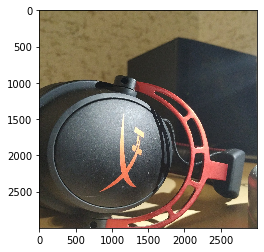

In [3]:
img = cv2.imread('input.jpg').astype('float32') / 255.0
print_max_min_median(img)
show_plt_img(img)

In [42]:
def to_3d(A):
    return np.repeat(A[:, :, np.newaxis], 3, axis=2)

def get(A, f):
    init = A[0]
    for a in A[1:]:
        init = f(a, init)
    return init

In [43]:
r,g,b = cv2.split(img)
total = to_3d(r + g + b)
sigma = img / total


In [41]:
sigmaMin = get(cv2.split(sigma), np.minimum)
sigmaMax = get(cv2.split(sigma), np.maximum)

In [45]:
_lambda = np.ones(img.shape) / 3
_lambda = (sigma - to_3d(sigmaMin)) / (3 * (_lambda - to_3d(sigmaMin)))

In [63]:
lambdaMax = get(cv2.split(_lambda), np.maximum)

In [47]:
SIGMAS = 0.25 * min(img.shape[0], img.shape[1]) % np.sqrt(img.shape[0] * img.shape[1]);
SIGMAR = 0.04;
THR = 0.03;

In [77]:
dst = cv2.ximgproc.jointBilateralFilter(sigmaMax, lambdaMax,  0, SIGMAS, SIGMAR)


error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\opencv_contrib-3.4.2\modules\ximgproc\src\joint_bilateral_filter.cpp:359: error: (-215:Assertion failed) src.depth() == joint.depth() && (src.depth() == 0 || src.depth() == 5) in function 'cv::ximgproc::jointBilateralFilter'


In [51]:
while True:
    sigmaMaxF = cv2.bilateralFilter(sigmaMax, lambdaMax, 0, 1, SIGMAS, SIGMAR)
    if np.count_nonzero(sigmaMaxF - sigmaMax > THR) == 0:
        break
    sigmaMax = max(sigmaMax, sigmaMaxF)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
total = sum(I, 3);

sigma = I ./ total;
sigma(isnan(sigma)) = 0;

sigmaMin = min(sigma, [], 3);
sigmaMax = max(sigma, [], 3);

lambda = ones(size(I)) / 3;
lambda = (sigma - sigmaMin) ./ ...
    (3 * (lambda - sigmaMin));
lambda(isnan(lambda)) = 1 / 3;

lambdaMax = max(lambda, [], 3);

SIGMAS = 0.25 * min(size(I, 1), size(I, 2));
              % sqrt(size(I, 1)*size(I, 2));
SIGMAR = 0.04;
THR = 0.03;

while true
    sigmaMaxF = bilateralFilter(sigmaMax, lambdaMax, 0, 1, SIGMAS, SIGMAR);
    if nnz(sigmaMaxF-sigmaMax > THR) == 0
        break
    end
    sigmaMax = max(sigmaMax, sigmaMaxF);
end

Imax = max(I, [], 3);

den = (1 - 3 * sigmaMax);
I_s = (Imax - sigmaMax .* total) ./ den;
I_s(den == 0) = max(I_s(den ~= 0));

I_d = min(1, max(0, I-I_s));
B